In [2]:
pip install bioinfokit


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [42]:
data = pd.read_csv("mcdonalds.csv")
data1=pd.read_csv("mcdonalds.csv")
print(data.columns)



Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [5]:
print(data.shape)


(1453, 15)


In [6]:
print(data.head(3))
#The segmentation variables are verbal, not numeric.

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  


In [7]:
#Segment extraction need numbers hence store the segmentation variables in a
#separate matrix, and convert them from verbal YES/NO to numeric binary.

#Convert first 11 coulmn entries in a binary matrix of 1 and 0
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

#55% people find McDonald's food yummy, 91% find it convenient and 9% find it spicy

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [8]:
#To analyse the data, perform PCA and create a perceptual map which shows which
#attributes tend to be rated in the same way.


#Create a PCA object
MD_pca = PCA()
MD_P=MD_pca.fit_transform(MD)
#Fit the object to MD matrix and store the principal components
MD_pca.fit(MD)

# Calculate the proportion of variance explained by each principal component
PV=MD_pca.explained_variance_ratio_
# Calculate the standard deviation of the principal components
SD=np.sqrt(MD_pca.explained_variance_)
# Create a list of index labels for the DataFrame
index = []
for i in range(len(SD)):
    i = i + 1
    index.append("PC{}".format(i))

# Create a DataFrame with the standard deviation, proportion of variance,
#and cumulative proportion of variance for each principal component
sum = pd.DataFrame({
    "Standard deviation": SD,
    "Proportion of Variance": PV,
    "Cumulative Proportion": PV.cumsum()
}, index=index)

# Print the DataFrame
sum

#the first two components capture about 50% of the information contained in the
# segmentation variables.

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [9]:
# Print the standard deviation of the principal components
# The standard deviation is a measure of how spread out the values of the
# principal components are.
print("Standard Deviation:\n", SD.round(1))

# Calculate the factor loadings
# The factor loadings are a measure of how the observed variables are related to
# the principal components.
load = (MD_pca.components_)
i = 0

# Create a rotation matrix
# The rotation matrix is a matrix that contains the factor loadings for each
# principal component.
rot_matrix = MD_pca.components_.T

# The DataFrame will contain the factor loadings for each principal component,
3 as well as the names of the observed variables.
rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df = round(-rot_df, 3)

rot_df

#We can observe that the two segmentation variables with the highest factor
#loadings for PC2 are CHEAP and EXPENSIVE, indicating that this captures the
# price dimension, and the segmentation variables with highest loadings for
#PC1 are YUMMY nad DISGUSTING, indicating that this capture taste dimension

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


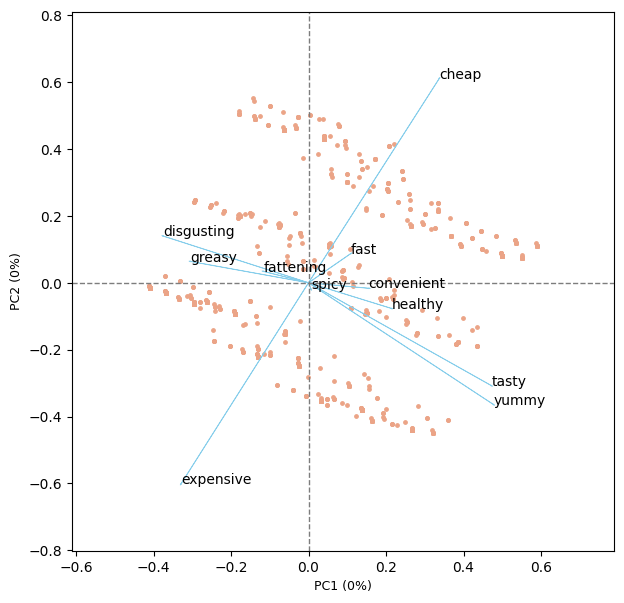

In [10]:
#now rotate and project consumers into the first two principal components and plot
#The biplot function is used to create a biplot, which is a graphical
#representation of the relationship between the principal components and
# the observed variables.

cluster.biplot(cscore=MD_P, loadings=-load, labels=data.columns.values,var1=0,
               var2=0, show=True, dim=(7,7))

In [11]:
#The perceptual map shows that CHEAP and EXPENSIVE are assessed quite
# independently of the others. The price dimension is critical in differentiating
# between groups of consumers.
#FATTENING, DISGUSTING and GREASY point in the same direction which means
#respondents who view McDonald’s as FATTENING, DISGUSTING are also likely to
#view it as GREASY.

K-Means clustering

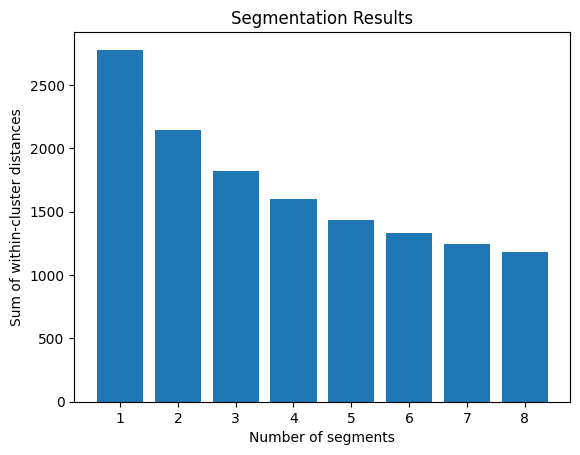

In [12]:
#To extract between 2 to 8 market segments we use Kmeans clusteing to compare
#them and choose the one which extracts segments containing similar consumers

# Set the random seed to ensure that the results are reproducible.
np.random.seed(1234)

# Set the number of repetitions
nrep = 10

# Create a list of the number of segments which will be used to create the KMeans models.
num_segments = range(1, 9)

within_cluster_distances = []

MD_km28 = {}

for k in num_segments:

    #  For each number of segments, a KMeans model is created and fit to the data.
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)

    # Calculate the within-cluster distances
    within_cluster_distances.append(kmeans.inertia_)

    # Store the KMeans model in the dictionary
    MD_km28[str(k)] = kmeans

# Plot the within-cluster distances
## The number of segments is used as the x-axis, and the sum of within-cluster
# distances is used as the y-axis.
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


In [13]:
#The scree plot does not provide useful guidance on the number of market
#segments to extract because it does not have a distinct elbow.
#This means that the sum of distances within market segments drops slowly
#as the number of market segments increases and is of not much use.

In [14]:
#Stability-based data structure analysis is a second approach to determining the
# optimal number of market segments. It uses stability across replications as a
# criterion to offer guidance. This means that the same segmentation solution
#should emerge if the analysis is repeated many times.
#This ensures that unstable, random solutions are not used.

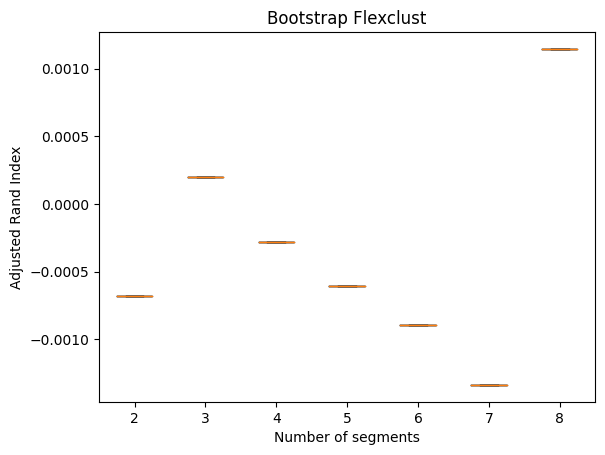

In [15]:
#Conduct  the analysis for each number of segments (between two and eight)
#using 2 × 100 bootstrap samples
#and ten random initialisations of k-means for each sample and number of segments.

# Set the random seed
np.random.seed(1234)

# Set the number of bootstrap samples
nboot = 100

# Set the number of random initializations
nrep = 10
bootstrap_samples = []

# Create a loop to generate the bootstrap samples
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

## Create a list to store the adjusted Rand index scores
adjusted_rand_index = []
num_segments = range(2, 9)#number of segments

# Create a loop to calculate the adjusted Rand index scores for each
# number of segments
for k in num_segments:
    stability_scores = []

    # Create a loop to calculate the stability scores for each bootstrap sample
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)

        # Fit the KMeans model to the bootstrap sample
        kmeans.fit(bootstrap_sample)

        #Predict the cluster labels for the bootstrap sample and origina data
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)

        # Calculate the adjusted Rand index score
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)

    # Store the stability scores in the list
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)



plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

In [16]:
#Observing from the box plot , we can see the vertical boxplots show the
# distribution of stability for each number ofsegments.
#A two- or three-segment solution is stable, but it does not offer a
# differentiated view of the market.
#A four-segment solution offers a good balance between stability and market
#insights, and it is the most stable solution that offers a differentiated view of the market.

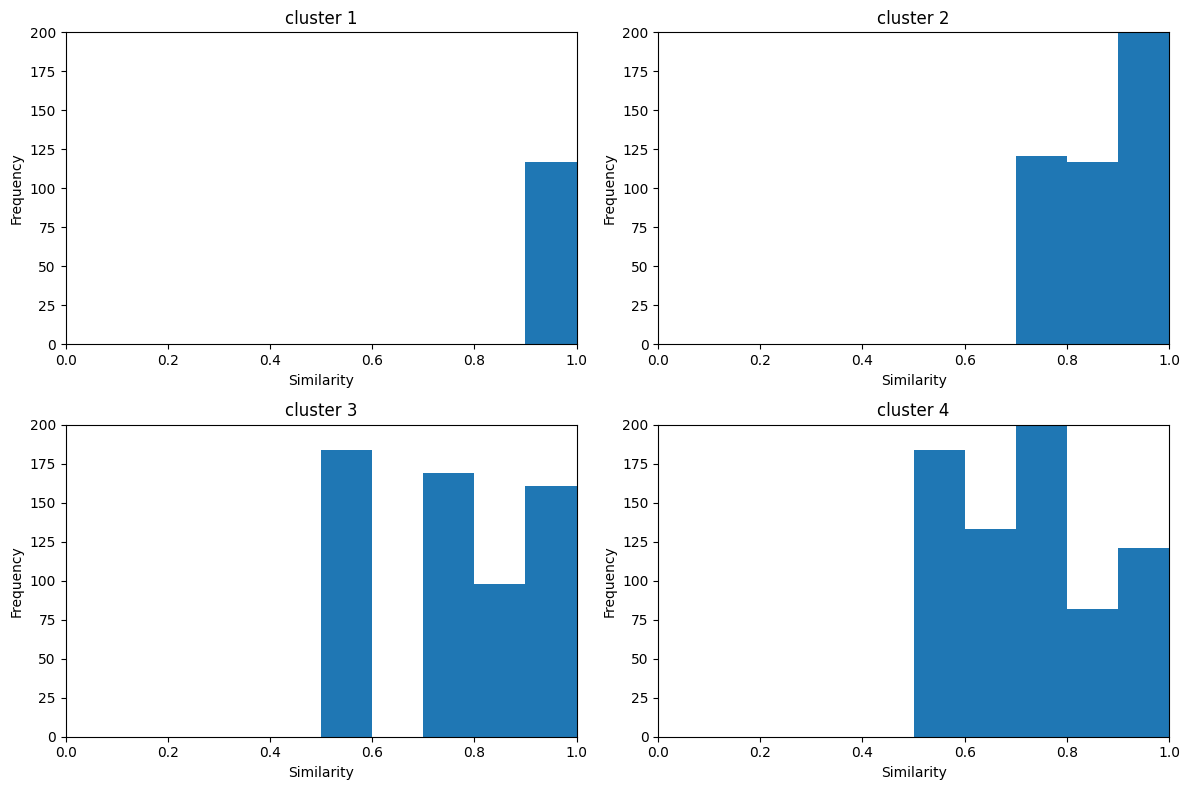

In [17]:
# We create a george plot for the distribution of similarities within each cluster.


# Define the range of values and the number of bins for the histogram.
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create a figure with subplots for each cluster.
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# For each cluster, calculate the similarities between the points in the cluster
#and the cluster centroid.
for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)

    # Plot the histogram of the similarities.
    row = (i - 1) // 2
    col = (i - 1) % 2
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)

    # Set the labels for the x-axis and y-axis.
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')

    # Set the title for the subplot.
    axs[row, col].set_title('cluster {}'.format(i))

    # Set the x-axis limits and the y-axis limits.
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    # Set the x-axis ticks.
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Tighten the layout of the figure.
plt.tight_layout()

# Show the plot.
plt.show()

In [18]:
# Global stability analysis compares segmentation solutions with the same number
# of segments. SLSA plot visualizes how individual segments change as more
# segments are added.
# Both methods can be used to assess the stability of a market segmentation solution.

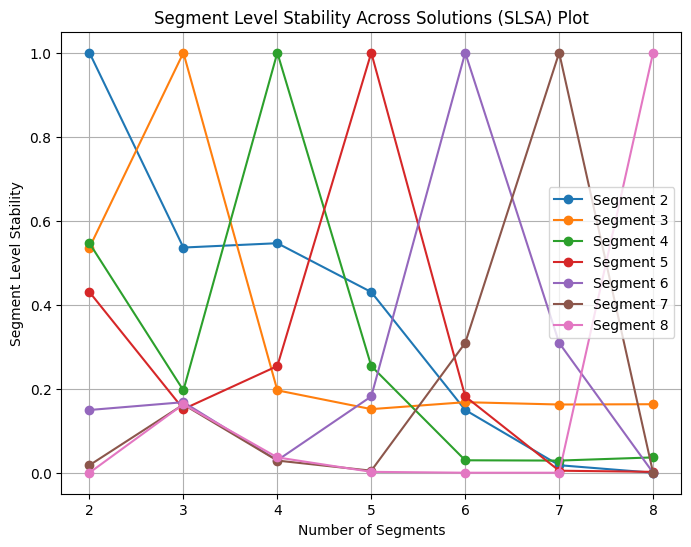

In [19]:
# Define a list of segment numbers, from 2 to 8.
num_segments = range(2, 9)

# Create a list of segment stability values.
# This list will contain the average number of times each observation is
#assigned to the same segment across all of the k-means models.
segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

# Create a figure with a size of 8 x 6 inches.
plt.figure(figsize=(8, 6))

# Plot the segment stability values for each segment.
#
# The label=f'Segment {segment}' argument adds a label to each curve.
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels)
    for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')

# Add x-ticks at the values in the num_segments list.
plt.xticks(num_segments)
plt.legend()

# Add a grid to the plot.
plt.grid(True)
plt.show()

In [20]:
#Segment 2 remains mostly unchanged until the four-segment solution, where it
#starts losing members.
#The Segment Level Stability Across Solutions (SLSA) plot suggests that
#segments 2, 3, and 4 are consistent across different solutions,
# indicating high stability.
# However, Segment 1 in the four-segment solution is quite different from
#the solutions with one fewer or one more segment.
# It draws members from two segments in the three-segment solution and splits
# into two segments in the five-segment solution.
# This lack of stability suggests that although the four-segment solution is
#generally good, Segment 1 may not be a reliable target segment due to its
# variability across solutions.

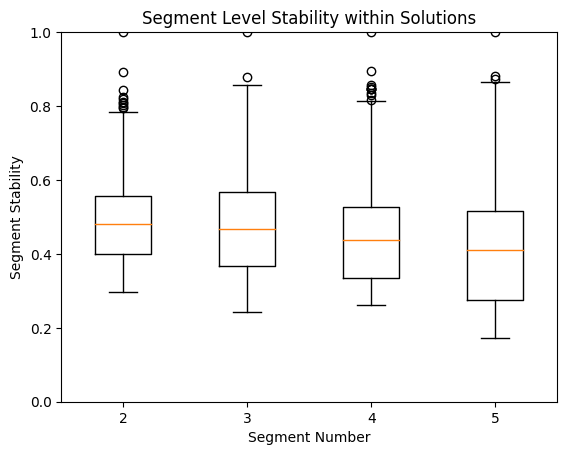

In [21]:
#After this exploration, we select the four-segment solution
#and save it in an object of its own. Global stability assesses the
# stability of a segmentation solution in
#its entirety and not the stability of each market segment.
# We obtain the stability of each segment by calculating segment level
#stability within solutions (SLSW )

# Define a list of segment solutions, from 2 to 5.This list will be used
#to store the number of segments in each segment solution.
segment_solutions = ["2", "3", "4", "5"]

# Create a dictionary to store the segment labels for each segment solution.
segment_labels = {}

# Create a dictionary to store the similarities between each observation
#and the other observations in the same segment.
segment_similarities = {}

# For each segment solution, get the segment labels and the similarities
#between each observation and the other observations in the same segment.
# The `MD_km28[segment]` object is a k-means model that has been trained
#on the `MD` dataset with `segment` number of segments.
for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

# Create a list of segment stability values.
# This list will contain the normalized similarities for each segment solution.
segment_stability_values = []
for segment in segment_solutions:
    # Get the similarities for the current segment solution.
    similarities = segment_similarities[segment]

    # Normalize the similarities so that they range from 0 to 1.
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# The `whis=1.5` argument tells matplotlib to show 1.5 outliers on either
#side of the boxplot.
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")

# Add x-ticks at the values in the `segment_solutions` list.
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)

# Set the y-axis limits to 0 and 1.
plt.ylim(0, 1)

plt.title("Segment Level Stability within Solutions")

plt.show()

In [22]:
#Segment 1 is the least stable across replications, followed by
# segments 4 and 2. Segment 3 is the most stable.

Using Mixtures of Distributions

In [23]:
#We calculate latent class analysis using a finite mixture of binary distributions.
#The goal is to extract segments from the data by maximizing the likelihood,
#unlike k-means, which minimizes squared Euclidean distance.

In [24]:
# Import necessary libraries
from scipy.stats import entropy

# Set a random seed for reproducibility
np.random.seed(1234)

# Define the range of k-values (number of clusters) to evaluate
k_values = range(2, 9)

# Create an empty list to store the results for different k-values
MD_m28 = []

# Loop through each k-value
for k in k_values:
    # Create a KMeans model with the current k-value and fit it to the data in MD
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)

    # Get the number of iterations the KMeans algorithm took to converge
    iter_val = model.n_iter_

    # Set 'converged' flag to True, as KMeans algorithm is guaranteed to converge
    converged = True

    # Store the k-value in 'k_val' and 'k0_val'
    k_val = k
    k0_val = k

    # Calculate the negative log-likelihood (inertia) of the KMeans model
    log_likelihood = -model.inertia_

    # Get the number of samples and features in the MD data
    n_samples, _ = MD.shape

    # Calculate the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k

    # Get the cluster labels assigned by the KMeans model
    labels = model.labels_

    # Count the number of samples in each cluster and calculate the probability of each cluster
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())

    # Calculate the entropy of the cluster probabilities as a measure of class uncertainty
    class_entropy = entropy(probs)

    # Calculate the Integrated Completed Likelihood (ICL) criterion using BIC and class entropy
    icl = bic - class_entropy

    # Append the evaluation metrics for the current k-value to the MD_m28 list
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Create a DataFrame from the list of evaluation metrics with appropriate column names
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the resulting DataFrame with the evaluation metrics for different k-values
print(MD_m28)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


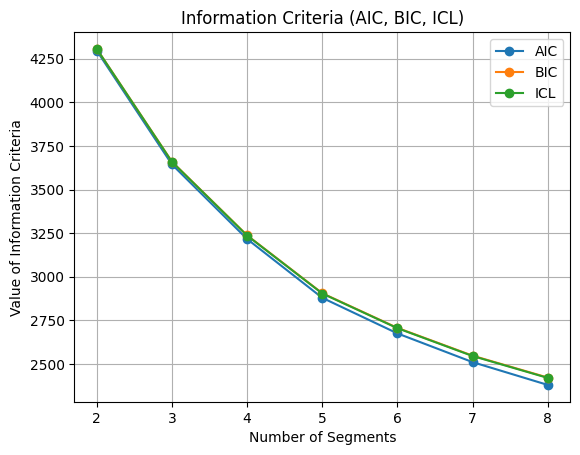

In [25]:
# We plot the information criteria with a customised label for the y-axis to
# choose a suitable number of segments

# Extract the number of segments (k-values) and corresponding AIC, BIC,
# and ICL values from the MD_m28 DataFrame
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

# Create a line plot for each information criterion, using the number of segments as x-axis
plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')

# Add a legend to the plot to identify each line
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#The information criteria values decrease significantly until four segments are reached.
#The ICL and BIC suggest extracting seven segments,
#while the AIC values continue to decrease beyond seven, implying that at least
# eight segments are needed to properly fit the data.
#The plot suggests that four market segments might be a good solution if a more
#pragmatic point of view is taken; this is the point at which the decrease in
#the information criteria flattens visibly. We retain the four-component
#solution and compare it to the four-cluster k-means solution using a cross-tabulation

In [27]:
from sklearn.mixture import GaussianMixture

# Set the number of clusters (segments) to 4
k = 4

# Perform KMeans clustering on the data MD with k=4 clusters
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

# Perform Gaussian Mixture Model (GMM) clustering on the data MD with k=4 components (clusters)
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

# Create a DataFrame 'results' to store the cluster assignments from KMeans and GMM
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Extract the subset of data (MD_m4) corresponding to GMM cluster 3 (mixture=3)
MD_m4 = MD[results['mixture'] == 3]

# Perform KMeans clustering on the subset data MD_m4 with k=4 clusters
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

# Create a new DataFrame 'results_m4' to store the cluster assignments from KMeans on MD_m4
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Print the cross-tabulation of KMeans and GMM cluster assignments (results)
print(pd.crosstab(results['kmeans'], results['mixture']))

# Print the cross-tabulation of KMeans cluster assignments on MD_m4 (results_m4)
# and the original GMM cluster 3
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

#The code prints the cross-tabulations of cluster assignments to compare the
# results between KMeans and GMM as well as between KMeans on the subset and the
#original GMM cluster 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
#This is interesting because all algorithms used to extract market segments are
# exploratory in nature. Typically, therefore, they find a local optimum or global
#optimum of their respective target function. The EM algorithm maximises the
#log- likelihood. The log-likelihood values for the two fitted mixture models obtained
#using the two different ways of initialisation are:


gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [29]:
#Similar results from different initialization methods
# (random restarts and k-means) increase confidence in the outcome as a
# global optimum or close approximation.
# This also validates the reliability of the k-means solution, and both
# solutions offer valuable insights for managers without being inherently correct or incorrect.

Using Mixtures of Regression Models

In [30]:
#Instead of grouping consumers based on similar perceptions of McDonald's,
#another approach aims to find market segments with similar perceptions that
#drive their love or hate for McDonald's.
#This is done using finite mixtures of linear regression models
 #(latent class regressions), treating "I LIKE MCDONALDS" responses on an
 # 11-point scale as the dependent variable and
#perceptions as independent variables. By converting the ordinal variable to
#a numeric one, market segments are formed based on how changes in perceptions
# affect consumers' liking for McDonald's.

In [31]:
# Calculate the count of each unique value in the 'Like' column of the
# 'data' DataFrame and store in 'like_counts'
like_counts = pd.value_counts(data['Like'])

# Reverse the order of the 'like_counts' Series to display the counts
# in descending order (from highest to lowest)
reversed_counts = like_counts.iloc[::-1]

# Print the 'reversed_counts' Series, which shows the count of each
#unique value in the 'Like' column in descending order
print(reversed_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: Like, dtype: int64


In [32]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)


 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [33]:
# Import the 'dmatrices' function from the 'patsy' library
from patsy import dmatrices

# Get the column names for the first 11 columns in the 'data'
#DataFrame and store them as 'independent_vars'
independent_vars = data.columns[0:11]

# Join the column names with a '+' sign to create the formula string for the regression model
formula_str = ' + '.join(independent_vars)

# Prepend 'Like ~ ' to the formula string to specify that 'Like' is the
#dependent variable in the regression model
formula_str = 'Like ~ ' + formula_str

# Use the 'dmatrices' function to create the design matrices for
#the regression model specified by 'formula_str'
# The result will be the design matrix for the dependent variable
#'Like', which is stored in 'f'
f = dmatrices(formula_str, data=data)[1]

# Print the design matrix 'f', which represents the dependent variable
#'Like' and its corresponding independent variables
print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [34]:
#It selects the first 11 columns of the 'data' DataFrame as independent
# variables and sets up a formula string for the model.
# The regression model predicts the 'Like' column based on the specified independent variables.
# The 'dmatrices' function then creates the design matrix 'f', representing
#the dependent variable 'Like' and its associated independent variables, which is then printed.

In [35]:
from patsy import dmatrix

# Set a random seed for reproducibility
np.random.seed(1234)

# Create the design matrix 'X' from the independent variables using 'dmatrix'
X = dmatrix(f.design_info, data=data)

# Create the design matrix 'y' for the dependent variable 'Like'
y = dmatrix('Like', data=data)

# Set the number of components (clusters) for the Gaussian Mixture Model
n_components = 2

# Set the number of initializations for the model
n_init = 10

# Set the verbose mode for the model fitting process
verbose = False

# Set the number of repetitions for the EM algorithm
n_rep = 10

# Create the Gaussian Mixture Model with specified settings
model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)

# Fit the model to the data 'X' and 'y'
MD_reg2 = model.fit(X, y)

# Print the Gaussian Mixture Model object 'MD_reg2', which contains information
#about the fitted model
print(MD_reg2)

# Calculate the cluster sizes (number of data points in each cluster) using 'bincount'
cluster_sizes = np.bincount(model.predict(X))

# Print the cluster sizes for each cluster
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


In [36]:
#The segmentation analysis is complete, and market segments have been extracted.
# To understand the four-segment k-means solution, a segment profile plot is created.
# This plot displays key characteristics of each segment and highlights
# differences between them. To ensure interpretability, attributes
# with similar patterns are grouped together using hierarchical cluster
# analysis on the attributes themselves (not consumers), identifying the
# most similar attributes one by one.

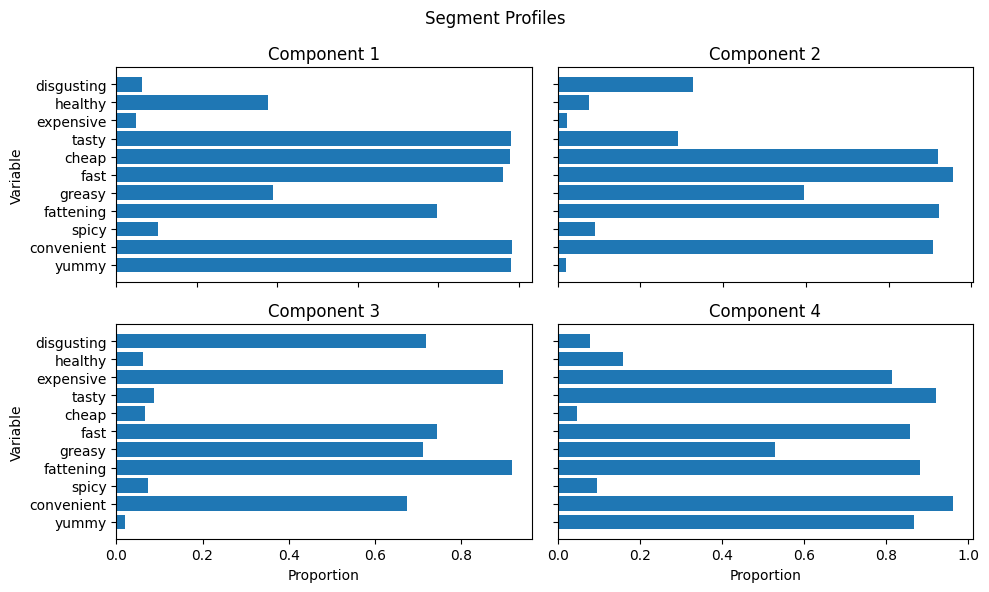

In [37]:
# Select the k-means model with 4 clusters (MD_km28['4'])
kmeans = MD_km28['4']

# Get the cluster labels assigned by the k-means model
labels = kmeans.labels_

# Group the data 'MD' by the cluster labels and calculate the mean of each cluster
MD_mean = MD.groupby(labels).mean()

# Create a 2x2 subplot figure with a size of 10x6 inches
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Create horizontal bar plots for each cluster's mean values on separate subplots
# and set titles for each subplot accordingly
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Set common labels and ticks for all subplots
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

# Hide labels on inner subplots
for ax in axs.flat:
    ax.label_outer()


fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

In [38]:
# The smallest segment (segment 2) contains 18% of consumers, the largest (segment 1) 32%.
#To understand the market segments, McDonald’s managers need to do two things:
# (1) compare the bars for each segment with the horizontal lines to see what
#makes each segment distinct from all consumers in the market; and
 #(2) compare bars across segments to identify differences between segments.

#segment 1 thinks McDonald’s is tasty and convenient. Segment 2 views McDonald’s
#as fast and fattening. This is also a very distinct perception, setting apart members
#of this segment from all other consumers. Members of segment 3 share the view
#that McDonald’s is fattening, but also think that the food served at McDonald’s is expensive.
#Finally, segment 4 is all praise: members of this market segment believe
#that McDonald’s food is tasty and convenient.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


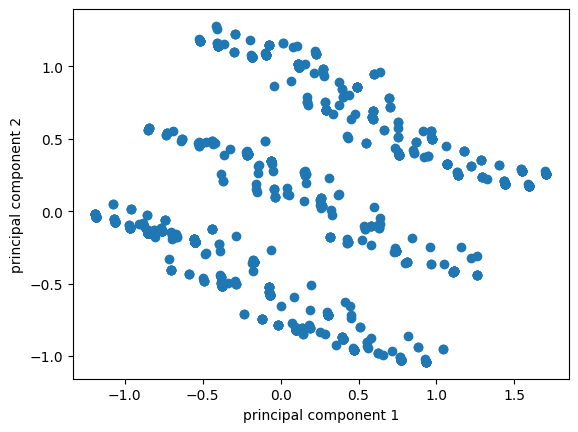

In [39]:
#Another visualisation that can help managers grasp the essence of market
#segments is the segment separation plot

# Create a KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to the data 'MD' to find the cluster centers
kmeans.fit(MD)

# Create a PCA (Principal Component Analysis) model with 2 components
# (to reduce data dimensionality)
pca = PCA(n_components=2)

# Apply PCA to transform the data 'MD' into two principal components
MD_pca = pca.fit_transform(MD)

# Create a scatter plot of the transformed data using the two principal components
fig, ax = plt.subplots()
ax.scatter(MD_pca[:, 0], MD_pca[:, 1])

# Set the labels for x and y axes
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')

# Display the plot
plt.show()

In [40]:
#The fast food data set lacks important descriptor variables typically
# used for market segmentation.
# However, it does include a variable for consumers' love or hate for McDonald's.
# By creating a simple mosaic plot, we can visualize the association between segment membership
# and this love-hate variable. The plot will show the deviation of
#observed frequencies from expected frequencies if variables are not associated (shade = TRUE),
# without requiring a title but having an x-axis label (xlab).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


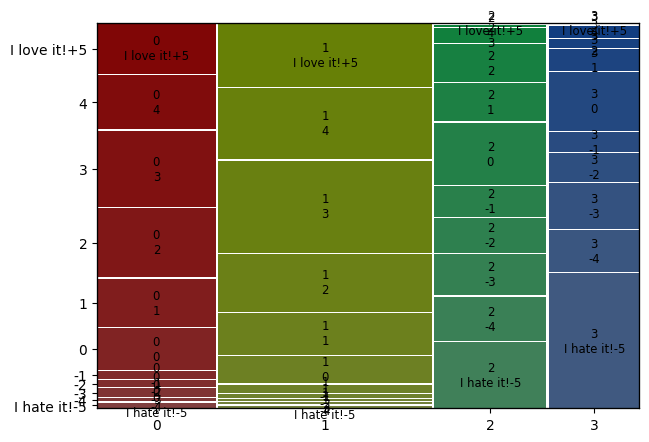

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

# Define a function to perform label encoding for categorical variables
# (converting "yes" and "no" to numerical values)
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

# List of categorical columns to label encode ("yes" and "no" to numerical values)
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

# Loop through each categorical column and perform label encoding
for i in cat:
    labelling(i)

# Select only the columns representing the categorical variables
df_eleven = data1.loc[:, cat]

# Perform KMeans clustering with 4 clusters using the categorical variables
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)

# Add the cluster number to the original data 'data1'
data1['cluster_num'] = kmeans.labels_

# Create a crosstabulation between the cluster number and the 'Like' variable
crosstab = pd.crosstab(data1['cluster_num'], data1['Like'])

# Reorder the columns to display the 'Like' variable in the proper order
crosstab = crosstab[['I hate it!-5', '-4', '-3', '-2', '-1', '0', '1', '2',
                     '3', '4', 'I love it!+5']]

# Set the figure size
plt.rcParams['figure.figsize'] = (7, 5)

# Display the mosaic plot visualizing the association between cluster membership
#and the 'Like' variable
mosaic(crosstab.stack())
plt.show()

In [ ]:
#The mosaic plot shows a strong association between segment number and loving or
#hating McDonald's.
# Segment 1 rarely expresses love for McDonald's while Segment 4 is
# significantly more likely to love McDonald's  and less likely to hate it.
# Segment 2 has the strongest negative feelings,with a high likelihood of
# hating McDonald's  and very few consumers loving it

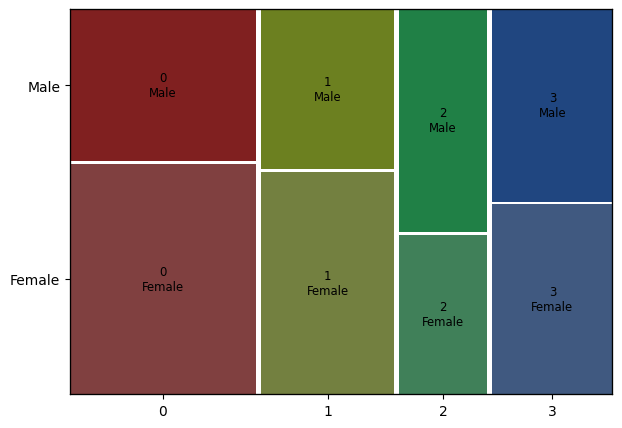

In [44]:
from statsmodels.graphics.mosaicplot import mosaic

# Extract the k-means model with 4 clusters (MD_k4) and get the cluster labels
MD_k4 = MD_km28['4']
k4 = MD_k4.labels_

# Create a crosstabulation between the cluster labels 'k4' and the 'Gender' variable
ct = pd.crosstab(k4, data['Gender'])

# Create the mosaic plot to visualize the association between cluster membership and gender
mosaic(ct.stack(), gap=0.01)

plt.show()

In [46]:
#The fast food data contains a few other basic descriptor variables, such as
# gender and age.
#Creates a mosaic plot to visualize the association between cluster membership and gender,
# where the size of each rectangle represents the frequency of data points in
#each combination of cluster and gender.

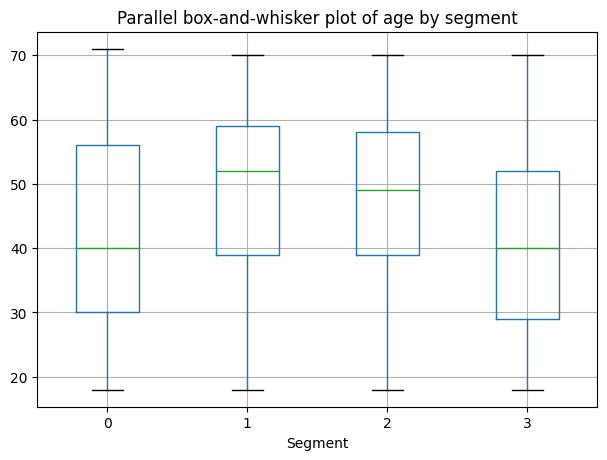

In [45]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

# Create a parallel box-and-whisker plot (boxplot) to visualize the distribution
# of ages within each segment.
# The 'Segment' column is used to group the data, and 'Age' column is used
# to plot the data distribution.
df.boxplot(by='Segment', column='Age')

# Set the title for the plot.
plt.title('Parallel box-and-whisker plot of age by segment')

# Remove the default super title (suptitle) to avoid duplication of the title.
plt.suptitle('')

plt.show()

In [48]:
# Label encode the 'VisitFrequency' column in the 'data1' DataFrame and replace
# it with numerical values
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])

# Group the data by 'cluster_num' and calculate the mean of 'VisitFrequency'
#within each cluster
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()

# Convert the series to a DataFrame, reset the index to make 'cluster_num'
# a regular column
visit = visit.to_frame().reset_index()
visit


,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [50]:
# Label encode the 'Like' column in the 'data1' DataFrame, converting
#the categorical values into numerical values
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])

# Group the data by 'cluster_num' and calculate the mean of 'Like' within each cluster
Like = data1.groupby('cluster_num')['Like'].mean()

# Convert the resulting series to a DataFrame, then reset the index to make
# 'cluster_num' a regular column in the DataFrame named 'Like'
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.396285
1,1,6.851724
2,2,4.391447
3,3,5.211382


In [52]:
# Label encode the 'Gender' column in the 'data1' DataFrame, converting the
#categorical values (e.g., 'Male', 'Female') into numerical values.
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])

# Group the data by 'cluster_num' and calculate the mean of 'Gender' within each cluster.
# Since 'Gender' is now numerical (0 for 'Male' and 1 for 'Female'), the mean
# will give the proportion of females in each cluster.
Gender = data1.groupby('cluster_num')['Gender'].mean()

# Convert the resulting series to a DataFrame, then reset the index to make
#'cluster_num' a regular column in the DataFrame named 'Gender'.
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


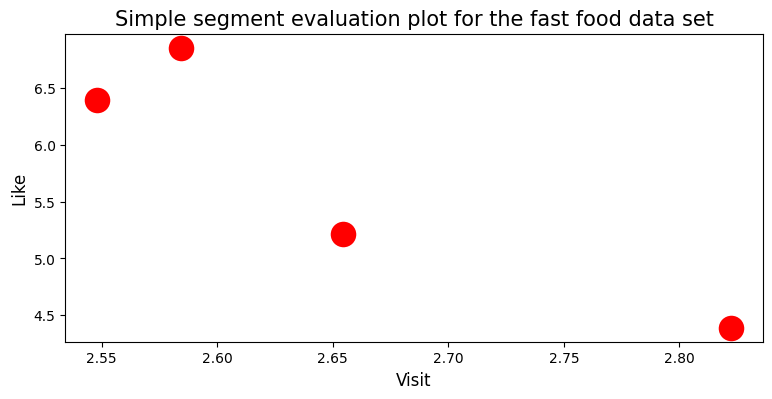

In [54]:
import seaborn as sns

# Merge the 'Gender', 'Like', and 'VisitFrequency' DataFrames based on the
#'cluster_num' column.
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit,
                                              on='cluster_num', how='left')

# Display the merged DataFrame 'segment' which contains information on
#cluster membership, gender, mean 'Like' score, and mean 'VisitFrequency'.
segment

# Set the figure size for the scatter plot
plt.figure(figsize=(9, 4))

# Create a scatter plot using seaborn to visualize the relationship between
#'VisitFrequency' and 'Like' for each cluster.
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")

# Set the title, x-axis label, and y-axis label for the plot
plt.title("Simple segment evaluation plot for the fast food data set", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)

plt.show()

In [ ]:
# In Step 9, the marketing mix is designed based on the characteristics and
# preferences of different market segments.
#For instance, if McDonald's wants to target segment 3, which consists of
# young customers who like the food but find it expensive,
#they could introduce a new product line, MCSUPERBUDGET, specifically
#tailored to meet their price expectations (4Ps: Price).
#The aim is to build customer loyalty, and as these customers' income increases,
# they might shift to the regular McDonald's products.
# To avoid cannibalization, the MCSUPERBUDGET line should have
#distinct product features (4Ps: Product).
#The company needs to identify communication channels heavily used by
# segment 3 to promote the new product line (4Ps: Promotion).
#Distribution channels would remain the same, but considering a separate
#queue for MCSUPERBUDGET orders to prevent impacting the main product line might be considered (4Ps: Place).


#After completing the market segmentation analysis and implementing marketing activities, it is crucial to continuously evaluate the segmentation strategy's success and monitor the market. Changes can happen within existing segments or in the broader marketplace, such as new competitors entering. McDonald's management needs to monitor all potential sources of change to adjust their marketing strategies accordingly and adapt to new market conditions.